![landlab](./files/landlab_logo_words.jpg)

# Using the landlab Flexure component

In this example we will:
* create a landlab component that solves the flexure equation
* apply a point loads all over the place
* run the component
* plot some output

A bit of magic so that we can plot within this notebook.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Create the component

We are going to build a uniform rectilinear grid with a node spacing of 10 km in each direction on which we will solve the flexure equation.

In [39]:
(n_rows, n_cols) = (200, 400)
(dy, dx) = (10e3, 10e3)

In [40]:
from landlab import RasterModelGrid
grid = RasterModelGrid((n_rows, n_cols), dx)

Now we create the flexure component and tell it to use our newly-created grid.

In [41]:
from landlab.components.flexure import FlexureComponent
flex = FlexureComponent(grid, method='flexure')

## Add some loading
We will add some loading at the center of the grid. For this component, the name of the variable that hold the applied loads is call, `lithosphere__overlying_pressure`. We add loads of random magnitude at every node of the grid.

In [42]:
loads = np.random.normal(1e9, 1e12, grid.number_of_nodes)
grid.at_node['lithosphere__overlying_pressure'][:] = loads

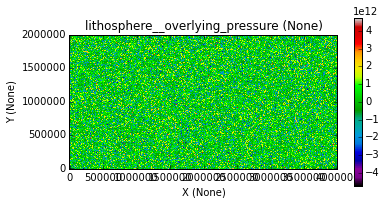

In [47]:
grid.imshow('node', 'lithosphere__overlying_pressure', symmetric_cbar=True,
            cmap='spectral', show=True, shrink=.75)

## Update the component to solve for deflection
If you have more than one processor on your machine you may want to use several of them.

In [44]:
flex.update(n_procs=4)

# Plot the output
The name of the variable that holds elevations is called `lithosphere__elevation`.

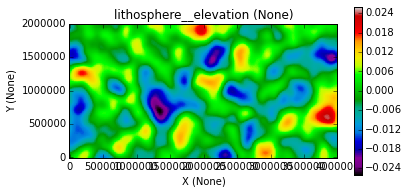

In [45]:
grid.imshow('node', 'lithosphere__elevation', symmetric_cbar=True,
            cmap='spectral', show=True, shrink=.75)